In [9]:
import matplotlib.pyplot as plt
import torch
import json
import numpy as np
from train_util import dataloader_setup

with open("config_unet.json", 'r') as file:
    config = json.load(file)
config["batch_size"] = 1
train_dataloader, val_dataloader, test_dataloader, train_polar_dataloader, val_polar_dataloader, test_polar_dataloader = dataloader_setup(
        config)

In [10]:
def plot_sample(sample):
    fig, (img1, img2) = plt.subplots(1, 2, layout="constrained")

    img1.imshow(sample[0].permute(1, 2, 0))
    img1.set_axis_off()
    img2.imshow(sample[1].permute(1, 2, 0))
    img2.set_axis_off()
    plt.show()

In [16]:
indices = list(np.random.randint(0, 400, size=5))


In [17]:
indices

[318, 154, 173, 281, 32]

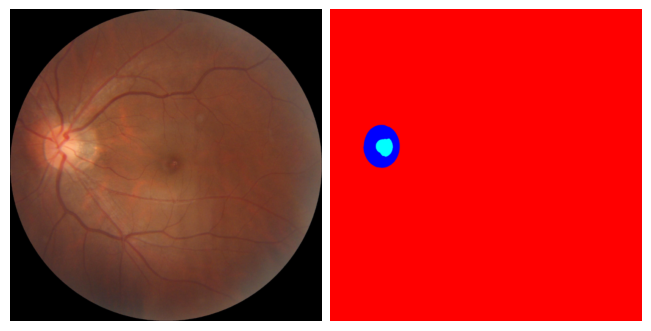

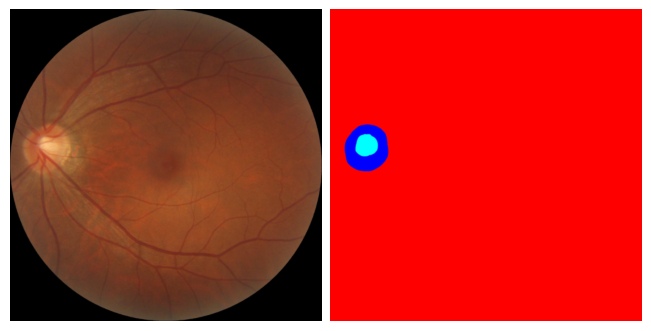

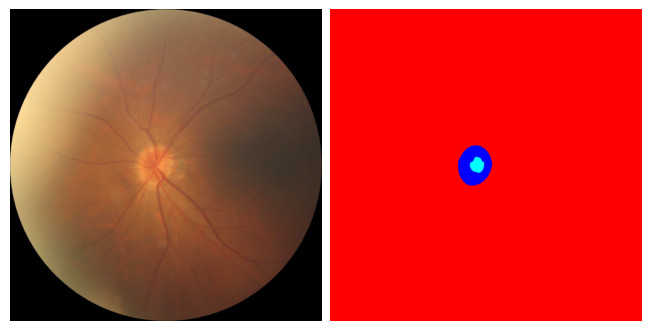

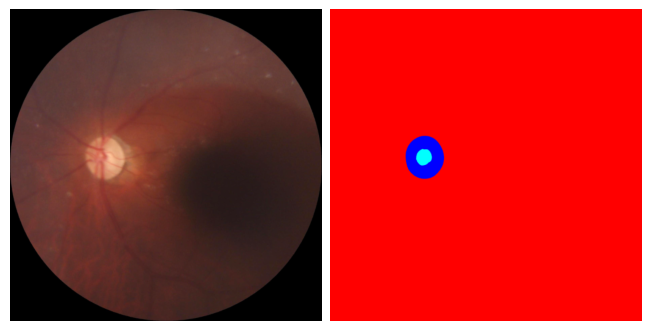

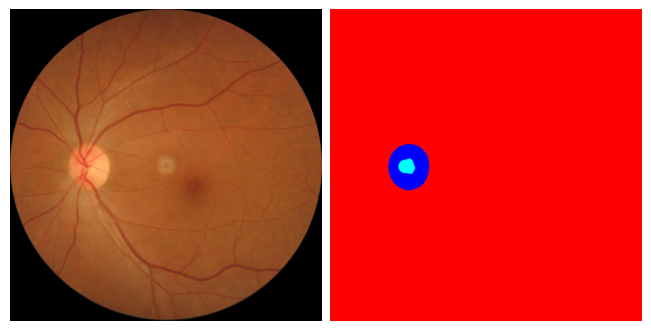

In [18]:
for j, batch in enumerate(test_dataloader):
    if j in indices:
        img, seg = batch[0][0], batch[1][0]
        plot_sample((img, seg))